# PROJECT NAME: DATA ANALYTICS USING MACHINE LEARNING TEHCNIQUES TO ENHANCED THE SMART GRID RELIABILITY

## Importing all the Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Reading the Fault Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Optimus Prime\\Desktop\\Z_Final_Project\\Data\\FaultDataset.csv")
df.head(6)

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972


In [3]:
df.isnull()

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7856,False,False,False,False,False,False,False,False,False,False
7857,False,False,False,False,False,False,False,False,False,False
7858,False,False,False,False,False,False,False,False,False,False
7859,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

G     0
B     0
Y     0
R     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   B       7861 non-null   int64  
 2   Y       7861 non-null   int64  
 3   R       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
df.head(10)

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389
8,1,0,0,1,-385.668729,-97.989839,-10.076824,0.334649,-0.057795,-0.276853
9,1,0,0,1,-359.929338,-87.319478,-0.452216,0.347420,-0.048314,-0.299106


In [7]:
df.describe()

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


## Creating the Fault Column for the Target

In [8]:
df['Fault_Type'] = df['G'].astype('str') + df['B'].astype('str') + df['Y'].astype('str') + df['R'].astype('str')
df.head()

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [9]:
df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'R-G Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Y-B Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'R-Y-G Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'R-Y-B Faults'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'R-Y-B-G Fault'

C:\Users\Optimus Prime\AppData\Local\Temp\ipykernel_10332\1200353544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
C:\Users\Optimus Prime\AppData\Local\Temp\ipykernel_10332\1200353544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'R-G Fault'
C:\Users\Optimus Prime\AppData\Local\Temp\ipykernel_10332\1200353544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [10]:
df.dtypes

G               int64
B               int64
Y               int64
R               int64
Ia            float64
Ib            float64
Ic            float64
Va            float64
Vb            float64
Vc            float64
Fault_Type     object
dtype: object

In [11]:
df['Fault_Type'].value_counts()

NO Fault         2365
R-Y-G Fault      1134
R-Y-B-G Fault    1133
R-G Fault        1129
R-Y-B Faults     1096
Y-B Fault        1004
Name: Fault_Type, dtype: int64

In [12]:
df.sample(10)

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
1417,1,0,1,1,604.607847,235.881041,49.792738,0.040701,-0.373360,0.332660,R-Y-G Fault
396,1,0,0,1,-705.524516,-70.432778,28.269035,0.272385,-0.169792,-0.102593,R-G Fault
129,1,0,0,1,-86.056759,40.747129,-50.064236,-0.367765,0.589356,-0.221591,R-G Fault
6106,0,0,0,0,15.314731,74.205732,-92.914480,-0.511434,0.569653,-0.058220,NO Fault
4967,1,1,1,1,769.080351,-761.535790,-7.546823,-0.001396,-0.035932,0.037329,R-Y-B-G Fault
7111,0,0,0,0,-27.834171,-10.043868,34.796482,0.509742,-0.507569,-0.002173,NO Fault
3165,0,1,1,0,32.609533,-769.445998,739.245053,-0.097372,0.008859,0.088513,Y-B Fault
6153,0,0,0,0,-30.402940,97.892898,-70.868689,-0.615099,0.253570,0.361528,NO Fault
502,1,0,0,1,-453.582943,13.686804,-43.634463,-0.293335,0.595038,-0.301704,R-G Fault
1365,1,0,1,1,872.586506,-465.737297,12.714924,0.019334,-0.291372,0.272038,R-Y-G Fault


In [13]:
df['Fault_Type'].value_counts()

NO Fault         2365
R-Y-G Fault      1134
R-Y-B-G Fault    1133
R-G Fault        1129
R-Y-B Faults     1096
Y-B Fault        1004
Name: Fault_Type, dtype: int64

## Visulization of the Overall Fault Dataset

Text(0.5, 1.0, 'Fault_Type')

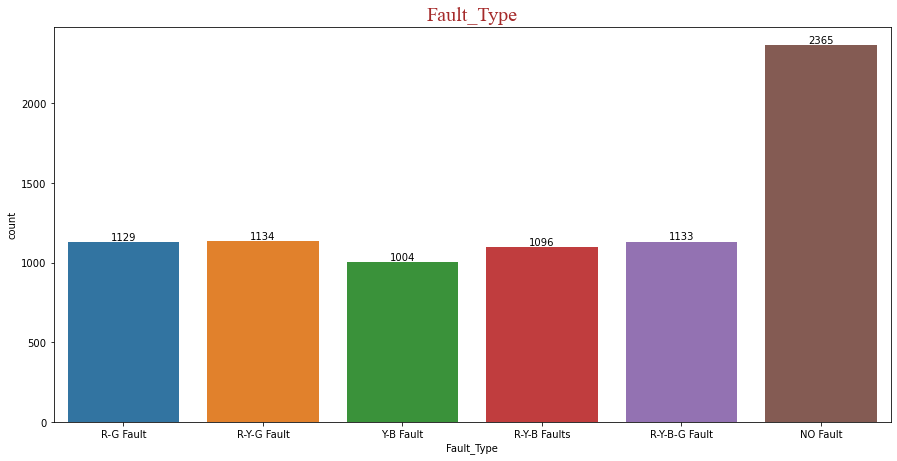

In [14]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Fault_Type", fontsize=20,color = 'Brown',font='Times New Roman')

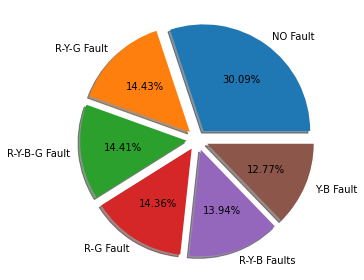

In [15]:
ax =plt.subplot(1,1,1)
ax=df['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

## R-Phase Visualization

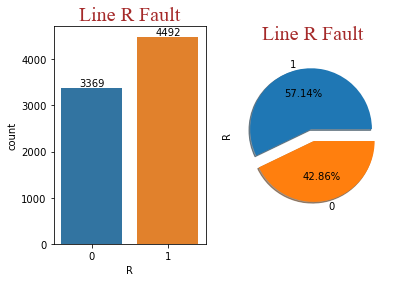

In [16]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='R', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line R Fault", fontsize=20,color = 'Brown',font='Times New Roman')

ax =plt.subplot(1,2,2)
ax=df['R'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line R Fault", fontsize = 20,color='Brown',font='Times New Roman',pad=20);

## Y-Phase Visualization

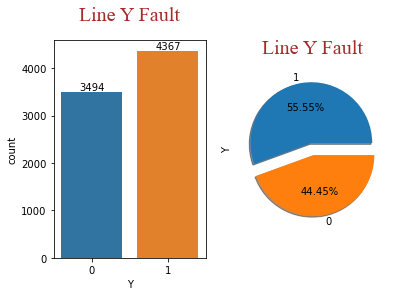

In [17]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Y', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line Y Fault", fontsize=20,color = 'Brown',font='Times New Roman',pad=20)

ax =plt.subplot(1,2,2)
ax=df['Y'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line Y Fault", fontsize = 20,color='Brown',font='Times New Roman',pad=20);

## B-Phase Visualization

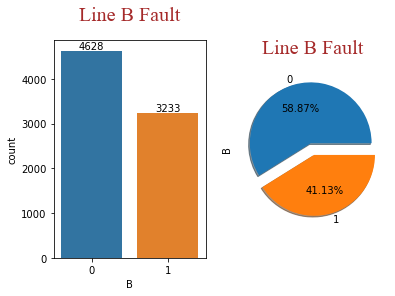

In [18]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='B', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line B Fault", fontsize=20,color = 'Brown',font='Times New Roman',pad=20)

ax =plt.subplot(1,2,2)
ax=df['B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line B Fault", fontsize = 20,color='Brown',font='Times New Roman',pad=20);

## Ground Visualization

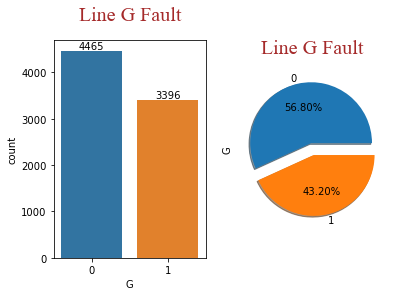

In [19]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=df)
ax.bar_label(ax.containers[0])
plt.title("Line G Fault", fontsize=20,color = 'Brown',font='Times New Roman',pad=20)

ax =plt.subplot(1,2,2)
ax=df['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Line G Fault", fontsize = 20,color='Brown',font='Times New Roman',pad=20);

In [20]:
df

,G,B,Y,R,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,R-G Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,R-G Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,R-G Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,R-G Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,R-G Fault
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,NO Fault
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,NO Fault
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,NO Fault
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,NO Fault


## Splitting the Dataset into Training and Testing

In [21]:
x = df.drop(['Fault_Type','G','B','Y','R'],axis=1)
y = df['Fault_Type']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=21)

# Algorithms

## LogisticRegression

In [23]:
lreg = LogisticRegression()
lreg.fit(X_train, y_train)
y_pred_lr = lreg.predict(X_test)

l_train = round(lreg.score(X_train, y_train) * 100, 2)
l_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",l_train ,"%")
print("Model Accuracy Score :",l_accuracy ,"%")

Training Accuracy    : 33.59 %
Model Accuracy Score : 31.98 %


C:\Users\Optimus Prime\A3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")

Training Accuracy    : 100.0 %
Model Accuracy Score : 88.87 %


## SVM

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")

Training Accuracy    : 76.46 %
Model Accuracy Score : 74.13 %


## Decision Tree

In [26]:
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")

Training Accuracy    : 100.0 %
Model Accuracy Score : 89.45 %


## Conclusion
### We used different Machine Learning Algorithms, Which has different accuracy. The Random Forest and Decision Tree giving the best Accuracy i.e. 89%.